# Kaggle Titanic

In [1]:
import pandas as pd

In [71]:
train = pd.read_csv('../../datasets/titanic/train.csv')
test = pd.read_csv('../../datasets/titanic/test.csv')

# Data definition


1. survival--> Survival --> 0 = No, 1 = Yes
2. pclass --> Ticket class --> 1 = 1st, 2 = 2nd, 3 = 3rd
3. sex --> Sex	
4. Age --> Age --> in years	
5. sibsp --> # of siblings or spouses aboard the Titanic	
6. parch --> # of parents or children aboard the Titanic	
7. ticket --> Ticket number	
8. fare --> Passenger fare	
9. cabin --> Cabin number	
10. embarked --> Port of Embarkation --> C = Cherbourg, Q = Queenstown, S = Southampton

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [75]:
#missing values
total = train.isnull().sum().sort_values(ascending=False)
percent = round(train.isnull().sum()*100/train.isnull().count(),2).sort_values(ascending=False)
null_values = pd.concat([total,percent],axis=1,keys = ['total','%'])
null_values[null_values.total >0]

,total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [76]:
# Investigating Age and sex
import seaborn as sns
male_passengers = train[train.Sex == 'male']
female_passengers = train[train.Sex == 'female']
lbl_survived = 'survived'
lbl_not_survived = 'not survived'

In [77]:
males_survived = male_passengers[male_passengers.Survived == 1].Age.dropna().describe()
males_not_survived = male_passengers[male_passengers.Survived == 0].Age.dropna().describe()
females_survived = female_passengers[female_passengers.Survived == 1].Age.dropna().describe()
females_not_survived = female_passengers[female_passengers.Survived == 0].Age.dropna().describe()
decription_age_gender = pd.concat([males_survived,males_not_survived,females_survived,females_not_survived],
                                  axis = 1, keys=['males_survived','males_not_survived','females_survived','females_not_survived'])

decription_age_gender


,males_survived,males_not_survived,females_survived,females_not_survived
count,93.000000,360.000000,197.000000,64.000000
mean,27.276022,31.618056,28.847716,25.046875
std,16.504803,14.056019,14.175073,13.618591
min,0.420000,1.000000,0.750000,2.000000
25%,18.000000,21.750000,19.000000,16.750000
50%,28.000000,29.000000,28.000000,24.500000
75%,36.000000,39.250000,38.000000,33.250000
max,80.000000,74.000000,63.000000,57.000000


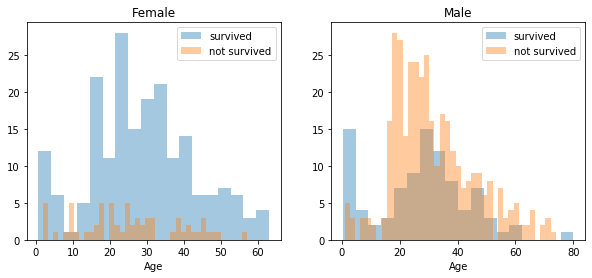

In [78]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (10,4))
ax = sns.distplot(female_passengers[female_passengers.Survived == 1].Age.dropna(),bins=18,
                  ax = axes[0],kde=False,label = lbl_survived)
ax = sns.distplot(female_passengers[female_passengers.Survived == 0].Age.dropna(),bins=40,
                 ax = axes[0],kde=False,label = lbl_not_survived)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(male_passengers[male_passengers.Survived == 1].Age.dropna(),bins=18,
                  ax = axes[1],kde=False,label = lbl_survived)
ax = sns.distplot(male_passengers[male_passengers.Survived == 0].Age.dropna(),bins=40,
                 ax = axes[1],kde=False,label = lbl_not_survived)
ax.legend()
_ = ax.set_title('Male')

In [79]:
# sns.FacetGrid?

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


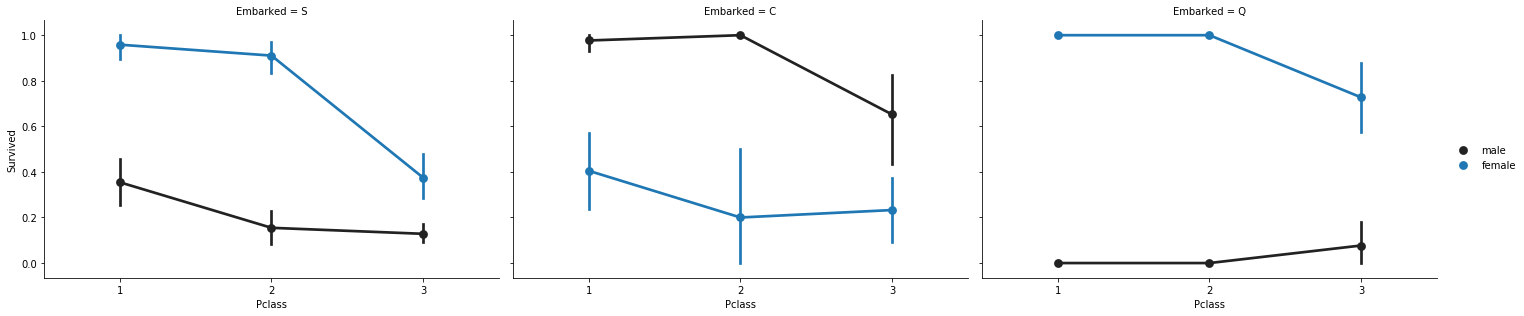

In [80]:
#Investigating Pclass, Embarked, Sex
Facet_grid = sns.FacetGrid(train,col='Embarked',size = 4.5, aspect = 1.5)
Facet_grid.map(sns.pointplot,'Pclass','Survived','Sex',palette = None, order = None,hue_order = None)
Facet_grid.add_legend()

In [81]:
# Facet grid is used to easily draw same plot for multiple less dimensional categorical data
# pointplot is used to compare categorical values at different levels. 
#In above case it is drawn between Pclass and Gender

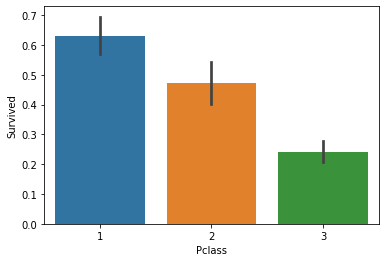

In [82]:
#Investigating Pclass
sns.barplot(x = 'Pclass',y = 'Survived',data=train)

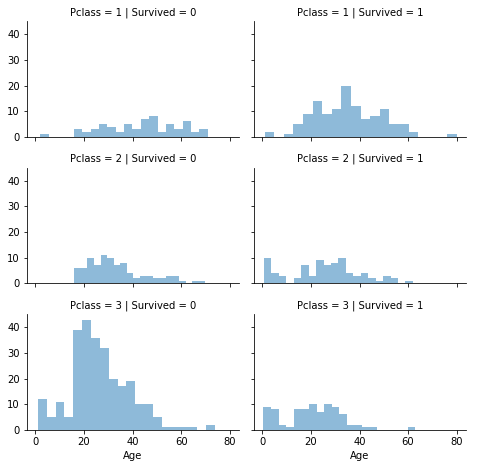

In [83]:
facetgrid = sns.FacetGrid(train,row = 'Pclass',col= 'Survived',height = 2.2,aspect=1.5)
facetgrid.map(plt.hist,'Age',bins = 20,alpha = 0.5)
facetgrid.add_legend()

In [84]:
data = [train,test]
for dataset in data:
    dataset['relatives'] = dataset.SibSp + dataset.Parch
    dataset.loc[train.relatives > 0, 'is_alone'] = 0
    dataset.loc[train.relatives == 0, 'is_alone'] = 1
    dataset.is_alone = train.is_alone.astype(int)

train.is_alone.value_counts()

1    537
0    354
Name: is_alone, dtype: int64

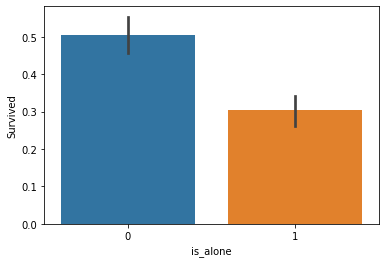

In [85]:
#Investigating Pclass
sns.barplot(x = 'is_alone',y = 'Survived',data=train)

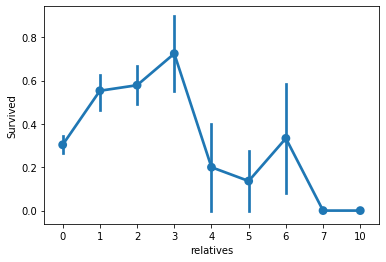

In [86]:
axes = sns.pointplot('relatives','Survived',data = train,aspect=2.5)

In [87]:
# Name analysis
import re
sample = train.Name.unique()[0]
nameregex = re.compile('([a-zA-Z]+)')
tokens = nameregex.findall(sample)
print(tokens)

['Braund', 'Mr', 'Owen', 'Harris']


# Handling missing data values

In [88]:
# Handling cabin information
import re
deck = {"A" : 1, "B" : 2, "C" : 3,'D' : 4, "E" : 5 , "F" : 6, "G" : 7, "S" : 8 }
data = [train,test]

for dataset in data:
    dataset.Cabin.fillna("S0",inplace = True)
    dataset['deck'] = dataset['Cabin'].map(lambda x: re.compile("[a-zA-Z]+").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int)

del train['Cabin']
del test['Cabin']

In [89]:
# Handling Age information
data = [train, test]

for dataset in data:
    missing_age = train.Age.median()
    dataset.Age.fillna(missing_age,inplace = True)
    dataset.Age = dataset.Age.astype(int)

train.Age.isnull().sum()

0

In [90]:
#Handling Embarked information
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [91]:
data = [train,test]

for dataset in data:
    dataset.Embarked.fillna('S',inplace = True)

train.Embarked.isnull().sum()

0

In [92]:
del train['PassengerId']

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  is_alone   891 non-null    int64  
 12  deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [94]:
# Handling Fare information
data = [train, test]

for dataset in data:
    dataset.Fare.fillna(0,inplace=True)
    dataset.Fare = round(dataset.Fare)
    dataset.Fare = dataset.Fare.astype(int)

In [95]:
sample = train.Name.unique()[0]
re.findall(' ([A-Za-z]+)\.',sample)[0]

'Mr'

In [96]:
# Handling Title information
data = [train,test]

for dataset in data:
    dataset['title'] = dataset.Name.map(lambda x: re.findall(' ([A-Za-z]+)\.',x)[0])

In [97]:
data = [train,test]

for dataset in data:
    dataset['lastName'] = dataset.Name.map(lambda x: re.findall('([a-zA-Z]+)',x)[0])

In [98]:
train[train['lastName'] == 'Abbott']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,is_alone,deck,title,lastName
279,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35,1,1,C.A. 2673,20,S,2,0,8,Mrs,Abbott
746,0,3,"Abbott, Mr. Rossmore Edward",male,16,1,1,C.A. 2673,20,S,2,0,8,Mr,Abbott


In [100]:
# Finding adjusted survival rate
for grp,df in train.groupby('lastName'):
    if(len(df)) < 2:
        train.loc[ (train['lastName'] == grp), 'adjusted_survival'] = -1
        test.loc[ (test['lastName'] == grp), 'adjusted_survival'] = -1
        continue
    number_of_ppl = len(df)
    survived = df['Survived'].sum()
    adjusted_survival = survived/number_of_ppl
    train.loc[ (train['lastName'] == grp), 'adjusted_survival'] = round(adjusted_survival,2)
    test.loc[ (test['lastName'] == grp), 'adjusted_survival'] = round(adjusted_survival,2)

train.adjusted_survival.fillna(-1,inplace=True)
test.adjusted_survival.fillna(-1,inplace=True)
    
del train['lastName']
del test['lastName']

In [101]:
train.adjusted_survival.unique()

array([ 0.  , -1.  ,  0.5 ,  0.33,  1.  ,  0.22,  0.2 ,  0.75,  0.44,
        0.67,  0.25])

In [102]:
# Handling Title information
data = [train,test]
title = {"Mr" : 1, "Miss" : 2,"Mrs" : 3, "Master" : 4, "Rare" : 5}

for dataset in data:
    dataset['title'] = dataset.title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['title'] = dataset.title.replace(['Mlle'],'Miss')
    dataset['title'] = dataset.title.replace(['Ms'],'Miss')
    dataset['title'] = dataset.title.replace(['Mme'],'Mrs')
    dataset['title'] = dataset['title'].map(title)
    del dataset['Name']
    
    dataset.title.fillna(0,inplace=True)
    

In [103]:
# Handling sex feature
genders = {'male' : 0, 'female' : 1}
data = [train, test]

for dataset in data:
    dataset.Sex = dataset.Sex.map(genders)

In [104]:
# Handling ticket information
train.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [105]:
# train.Ticket.unique()

In [106]:
data = [train, test]

for dataset in data:
    del dataset['Ticket']

In [107]:
# Handling Embarked information
ports = {'S' : 1, 'C' : 2, 'Q' : 3}
data = [train, test]

for dataset in data:
    dataset.Embarked = dataset.Embarked.map(ports)

In [108]:
pd.qcut(train.Age,8,duplicates='drop').value_counts()

(27.0, 28.0]      204
(17.0, 22.0]      118
(35.0, 45.0]      116
(29.0, 35.0]      113
(-0.001, 17.0]    113
(22.0, 27.0]      106
(45.0, 80.0]      101
(28.0, 29.0]       20
Name: Age, dtype: int64

In [109]:
# Handling Age information
data = [train, test]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'age_bucket'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'age_bucket'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'age_bucket'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'age_bucket'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'age_bucket'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'age_bucket'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'age_bucket'] = 6
    dataset.loc[ dataset['Age'] > 66, 'age_bucket'] = 7
    dataset['age_bucket'] = dataset['age_bucket'].astype(int)

In [110]:
train.age_bucket.value_counts()

4    303
6    141
3    106
5    103
2     92
1     71
0     68
7      7
Name: age_bucket, dtype: int64

In [111]:
data = [train, test]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'is_minor'] = 0
    dataset.loc[ dataset['Age'] > 16, 'is_minor'] = 1

In [112]:
del train['Age']
del test['Age']

In [113]:
train.is_minor.value_counts()

1.0    791
0.0    100
Name: is_minor, dtype: int64

In [114]:
# Handling Fare information
pd.qcut(train.Fare,5).value_counts()

(-0.001, 8.0]    293
(22.0, 40.0]     178
(40.0, 512.0]    175
(10.0, 22.0]     175
(8.0, 10.0]       70
Name: Fare, dtype: int64

In [115]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 8, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 10), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 22), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 22) & (dataset['Fare'] <= 40), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 40) , 'Fare'] = 4

In [116]:
# Creating new features
data = [train, test]

for dataset in data:
    dataset['age_Class'] = dataset['age_bucket'] * dataset['Pclass']

In [117]:
data = [train, test]

for dataset in data:
    dataset['fare_per_Person'] = dataset['Fare'] / (dataset['relatives'] + 1)
    dataset['fare_per_Person'] = dataset['fare_per_Person'].astype(int)

In [118]:
train.sample(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,relatives,is_alone,deck,title,adjusted_survival,age_bucket,is_minor,age_Class,fare_per_Person
711,0,1,0,0,0,3,1,0,1,3,1,-1.00,4,1.0,4,3
390,1,1,0,1,2,4,1,3,0,2,1,0.67,5,1.0,5,1
882,0,3,1,0,0,2,1,0,1,8,2,-1.00,2,1.0,6,2
193,1,2,0,1,1,3,1,2,0,6,4,0.67,0,0.0,0,1
442,0,3,0,1,0,0,1,1,0,8,1,-1.00,3,1.0,9,0
23,1,1,0,0,0,3,1,0,1,1,1,-1.00,4,1.0,4,3
655,0,2,0,2,0,4,1,2,0,8,1,0.00,3,1.0,6,1
88,1,1,1,3,2,4,1,5,0,3,2,0.50,3,1.0,3,0
362,0,3,1,0,1,2,2,1,0,8,3,0.00,6,1.0,18,1
174,0,1,0,0,0,3,2,0,1,1,1,0.25,6,1.0,6,3


In [119]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1)

# Feature Scaling

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()

In [122]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [123]:
X_test_scaled = scaler.transform(X_test)

In [124]:
from sklearn.model_selection import GridSearchCV,cross_val_score

# Implementing Random forest classifier

In [125]:
#Hyper-parameter tuning
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "criterion" : ['gini','entrpy'],
    "min_samples_leaf" : [1,5,8,10],
    "min_samples_split" : [2,4,10,12,16],
    "n_estimators" : [100,200,400,800]
}
randomforest_classifier = RandomForestClassifier(n_estimators=100,random_state=42,oob_score=True)

In [126]:
clf = GridSearchCV(estimator=randomforest_classifier,n_jobs=-1,param_grid=param_grid)
# clf.fit(X_train,y_train)
clf.fit(X_train_scaled,y_train)
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 400}

In [127]:
randomforest_classifier = RandomForestClassifier(criterion='gini',min_samples_leaf=5,min_samples_split=2
                                                 ,n_estimators=400,random_state=42)

In [128]:
# randomforest_classifier.fit(X_train,y_train)
randomforest_classifier.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [129]:
from sklearn.model_selection import cross_val_score
# scores = cross_val_score(randomforest_classifier,X_train,y_train,cv=10,scoring='accuracy')
scores = cross_val_score(randomforest_classifier,X_train_scaled,y_train,cv=10,scoring='accuracy')

print("Scores ",scores)
print("Mean ",scores.mean())
print("Std ",scores.std())

Scores  [0.86666667 0.91011236 0.80898876 0.8988764  0.8988764  0.85393258
 0.87640449 0.87640449 0.92134831 0.84269663]
Mean  0.8754307116104869
Std  0.03230722986230929


In [130]:
if 'Survived' in X_test.columns:
    del X_test['Survived']
    
# y_pred = randomforest_classifier.predict(X_test)
# acc_random_forest = round((randomforest_classifier.score(X_train,y_train)*100),2)
y_pred = randomforest_classifier.predict(X_test_scaled)
acc_random_forest = round((randomforest_classifier.score(X_train_scaled,y_train)*100),2)
acc_random_forest

89.56

In [131]:
# Feature importances
feature_importance = pd.DataFrame({'feature':X_train.columns,'importance' : randomforest_classifier.feature_importances_*100})
feature_importance.sort_values('importance',ascending= False,inplace=True)
feature_importance

,feature,importance
1,Sex,22.092119
9,title,21.805474
10,adjusted_survival,17.466432
0,Pclass,7.071135
13,age_Class,5.084934
8,deck,4.981745
4,Fare,4.759740
6,relatives,4.096345
14,fare_per_Person,3.532375
11,age_bucket,2.825167


In [ ]:
# del X_train['not_alone']
# del X_test['not_alone']

# implementing SGD Classifier

In [134]:
from sklearn.linear_model import SGDClassifier

In [135]:
sgdclassifier = SGDClassifier(max_iter=1000,random_state=42)

In [136]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
    "max_iter" : [500,1000,1500]
}

In [137]:
clf = GridSearchCV(sgdclassifier,n_jobs=-1, param_grid=params)
# clf.fit(X_train,y_train)
clf.fit(X_train_scaled,y_train)
clf.best_params_

{'alpha': 0.1, 'loss': 'modified_huber', 'max_iter': 500, 'penalty': 'l2'}

In [138]:
sgdclassifier = SGDClassifier(alpha=0.1,loss='modified_huber',max_iter=500,penalty='l2',random_state=42)

In [139]:
# scores = cross_val_score(sgdclassifier,X_train,y_train,cv=10,scoring='accuracy')
scores = cross_val_score(sgdclassifier,X_train_scaled,y_train,cv=10,scoring='accuracy')

print("Scores ",scores)
print("Mean ",scores.mean())
print("Std ",scores.std())

Scores  [0.8        0.82022472 0.74157303 0.85393258 0.82022472 0.80898876
 0.82022472 0.80898876 0.84269663 0.80898876]
Mean  0.8125842696629213
Std  0.028339564531118088


In [140]:
# sgdclassifier.fit(X_train,y_train)
sgdclassifier.fit(X_train_scaled,y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='modified_huber', max_iter=500,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [141]:
if 'Survived' in X_test.columns:
    del X_test['Survived']
    
# y_pred = sgdclassifier.predict(X_test)
# acc_sgd_classifier = round((sgdclassifier.score(X_train,y_train)*100),2)
y_pred = sgdclassifier.predict(X_test_scaled)
acc_sgd_classifier = round((sgdclassifier.score(X_train_scaled,y_train)*100),2)
acc_sgd_classifier

82.27

In [142]:
# Feature importances
feature_importance = pd.DataFrame({'feature':X_train.columns,'importance' : randomforest_classifier.feature_importances_*100})
feature_importance.sort_values('importance',ascending= False,inplace=True)
feature_importance

,feature,importance
1,Sex,22.092119
9,title,21.805474
10,adjusted_survival,17.466432
0,Pclass,7.071135
13,age_Class,5.084934
8,deck,4.981745
4,Fare,4.759740
6,relatives,4.096345
14,fare_per_Person,3.532375
11,age_bucket,2.825167


# implementing XGBoost

In [145]:
from xgboost import XGBClassifier

In [146]:
# XGBClassifier?

In [147]:
xgboost_classifier = XGBClassifier(random_state = 42)

In [148]:
#Hyper-parameter tuning

param_grid = {
    'max_depth' : [4,5,6,7,8],
    'min_child_weight' : [5,6,7,8],
    'learning_rate' : [0.1,0.2],
    'gamma' : [0.1,0.2],
    "n_estimators" : [100,200,400,800]
}
xgboost_classifier = XGBClassifier(n_estimators=100,random_state=42,oob_score=True)

In [149]:
clf = GridSearchCV(estimator=xgboost_classifier,n_jobs=-1,param_grid=param_grid)
# clf.fit(X_train,y_train)
clf.fit(X_train_scaled,y_train)
clf.best_params_

{'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 100}

In [150]:
xgboost_classifier = XGBClassifier(gamma = 0.1, learning_rate = 0.1,
                                   n_estimators=100,max_depth = 7,
                                   min_child_weight = 5, random_state=42,oob_score=True)

In [151]:
# xgboost_classifier.fit(X_train,y_train)
xgboost_classifier.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', oob_score=True, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [152]:
scores = cross_val_score(xgboost_classifier,X_train_scaled,y_train,cv=10,scoring='accuracy')

print("Scores ",scores)
print("Mean ",scores.mean())
print("Std ",scores.std())

Scores  [0.85555556 0.88764045 0.83146067 0.85393258 0.91011236 0.86516854
 0.86516854 0.86516854 0.88764045 0.86516854]
Mean  0.8687016229712858
Std  0.020639694719989297


In [153]:
if 'Survived' in X_test.columns:
    del X_test['Survived']

    
# y_pred = xgboost_classifier.predict(X_test)
# acc_xgb_classifier = round((xgboost_classifier.score(X_train,y_train)*100),2)
y_pred = xgboost_classifier.predict(X_test_scaled)
acc_xgb_classifier = round((xgboost_classifier.score(X_train_scaled,y_train)*100),2)
acc_xgb_classifier

90.91

# Correlation matrix

In [ ]:
# f = plt.figure(figsize=(19, 15))
# plt.matshow(train.corr(), fignum=f.number)
# plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=45)
# plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

# Submitting Predictions

In [154]:
test['Survived'] = y_pred

In [155]:
test[['PassengerId','Survived']].to_csv("gender_submission.csv",index=False)